# Sprint 3, Task 5

## Level 1

### Exercise 1

Download the Airlines Delay dataset and load it into a Pandas Dataframe. Explore its data and keep only those columns you consider as relevant.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
dades = pd.read_csv("dataset/DelayedFlights.csv")

#Obtain informatio about the dataset and remove innecessary variables:

#dades.head()
#dades.info
#dades.isnull().sum()

del dades["Unnamed: 0"]
del dades["TailNum"]
del dades["TaxiIn"]
del dades["TaxiOut"]
del dades["Year"]
del dades["FlightNum"]


## Level 2

### Exercise 2

Make a complete summary of the dataset:

- Do a statistical summary of the columns of interest

- Find out how many missing data exist in all columns

- Create new columns: average flight speed, delay (yes/no), etc.

- Find the airlines with the highest number of delayed flights

- Which are the longest flights? And the most delayed?

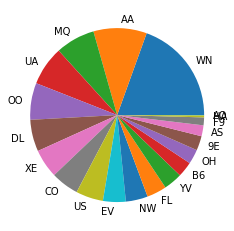

In [3]:
# Airlines that see the highest number of delays

x = dades["UniqueCarrier"].value_counts()
noms = dades["UniqueCarrier"].value_counts().index.values

plt.pie(x, labels = noms)
plt.show()

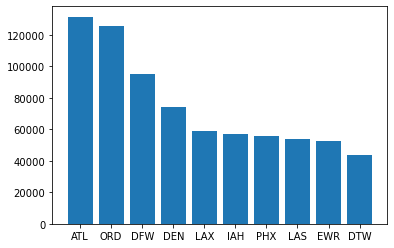

In [4]:
# Airports that see the most delays
    
aseaet = dades["Origin"].value_counts().sort_values(ascending = False)[:10]

y = aseaet
x = aseaet.index.values

plt.bar(x, y)
plt.show()

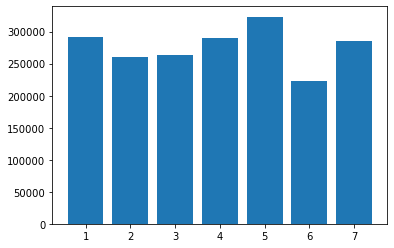

In [5]:
# Days with the most delays (Monday = 1)
    
x = dades["DayOfWeek"].value_counts().index.values
y = dades["DayOfWeek"].value_counts()

plt.bar(x, y)
plt.show()

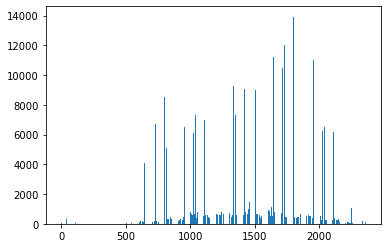

In [6]:
# Times of the day with more delays

x = dades["CRSDepTime"].value_counts().index.values
y = dades["CRSDepTime"].value_counts()

plt.bar(x, y)
plt.show()

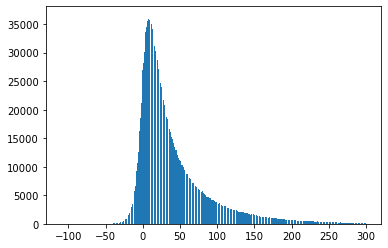

In [7]:
# Statistical summary of delays lateness

filtrat = dades[dades["ArrDelay"] < 300]

x = filtrat["ArrDelay"].value_counts().index.values
y = filtrat["ArrDelay"].value_counts()

plt.bar(x, y)
plt.show()

In [8]:
# Missing data per column:

dades.isnull().sum()

Month                     0
DayofMonth                0
DayOfWeek                 0
DepTime                   0
CRSDepTime                0
ArrTime                7110
CRSArrTime                0
UniqueCarrier             0
ActualElapsedTime      8387
CRSElapsedTime          198
AirTime                8387
ArrDelay               8387
DepDelay                  0
Origin                    0
Dest                      0
Distance                  0
Cancelled                 0
CancellationCode          0
Diverted                  0
CarrierDelay         689270
WeatherDelay         689270
NASDelay             689270
SecurityDelay        689270
LateAircraftDelay    689270
dtype: int64

In [9]:
# Since the dataframe has millions of cases, null values can be deleted and it will not affect the validity of
# further analysis

dades.dropna(inplace=True)

dades.isnull().sum()

Month                0
DayofMonth           0
DayOfWeek            0
DepTime              0
CRSDepTime           0
ArrTime              0
CRSArrTime           0
UniqueCarrier        0
ActualElapsedTime    0
CRSElapsedTime       0
AirTime              0
ArrDelay             0
DepDelay             0
Origin               0
Dest                 0
Distance             0
Cancelled            0
CancellationCode     0
Diverted             0
CarrierDelay         0
WeatherDelay         0
NASDelay             0
SecurityDelay        0
LateAircraftDelay    0
dtype: int64

In [10]:
# Average flight speed column (in miles per minute):

def speed(time, distance):
    if (time == 0):
        return 0
    else:
        return distance / time

dades["AvSpeed"] = dades.apply(lambda x: speed(x["AirTime"], x["Distance"]), axis=1)

dades[["AirTime", "Distance", "AvSpeed"]].head(15)


,AirTime,Distance,AvSpeed
3,77.0,515,6.688312
5,230.0,1591,6.917391
7,107.0,828,7.738318
9,213.0,1489,6.990610
11,110.0,838,7.618182
12,49.0,220,4.489796
13,47.0,220,4.680851
17,143.0,1093,7.643357
19,134.0,972,7.253731
23,118.0,765,6.483051


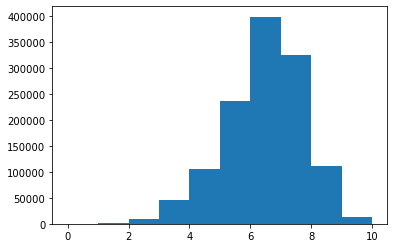

In [11]:
x = dades["AvSpeed"]

plt.hist(x, range= (x.min(), 10))
plt.show()

In [12]:
# Most delayed flights:

dades.sort_values(by=["ArrDelay"], ascending=False, inplace=True)

dades[["DepTime","CRSArrTime", "ArrTime", "CRSArrTime", "ArrDelay"]].head(20)


,DepTime,CRSArrTime,ArrTime,CRSArrTime,ArrDelay
322516,1117.0,555,2256.0,555,2461.0
686014,724.0,1605,858.0,1605,2453.0
839306,2.0,1823,254.0,1823,1951.0
1009553,2140.0,1825,2252.0,1825,1707.0
1881639,1602.0,1546,1921.0,1546,1655.0
1497823,906.0,825,1048.0,825,1583.0
685437,1818.0,1800,1942.0,1800,1542.0
163379,800.0,1327,1452.0,1327,1525.0
1214839,820.0,1215,1325.0,1215,1510.0
521096,705.0,721,811.0,721,1490.0


In [13]:
# Longest flights:

dades.sort_values(by=["ActualElapsedTime"], ascending=False, inplace=True)

dades.head(20)


,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,ActualElapsedTime,CRSElapsedTime,...,Distance,Cancelled,CancellationCode,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay,AvSpeed
1488690,9,9,2,1411.0,920,545.0,1215,HA,1114.0,355.0,...,2677,0,N,0,1040.0,0.0,0.0,0.0,10.0,2.453712
1926817,12,19,5,1407.0,1335,2217.0,1935,CO,790.0,660.0,...,4962,0,N,0,0.0,32.0,130.0,0.0,0.0,7.826498
1173580,7,23,3,1727.0,1645,323.0,2033,DL,776.0,408.0,...,2586,0,N,0,0.0,0.0,368.0,0.0,42.0,7.473988
1367047,8,19,2,1547.0,1230,717.0,2105,HA,750.0,335.0,...,2677,0,N,0,612.0,0.0,0.0,0.0,0.0,3.652115
1418032,8,2,6,1808.0,1335,38.0,1810,CO,750.0,635.0,...,4962,0,N,0,0.0,12.0,115.0,0.0,261.0,8.311558
528094,3,6,4,1337.0,1245,2144.0,1720,AA,727.0,515.0,...,3784,0,N,0,0.0,52.0,212.0,0.0,0.0,8.051064
1250037,7,27,7,1417.0,1335,2021.0,1810,CO,724.0,635.0,...,4962,0,N,0,20.0,0.0,89.0,0.0,22.0,8.353535
556381,3,21,5,1345.0,1320,1936.0,1820,CO,711.0,660.0,...,4962,0,N,0,25.0,0.0,51.0,0.0,0.0,7.575573
1926347,12,20,6,1441.0,1335,2123.0,1935,CO,702.0,660.0,...,4962,0,N,0,66.0,0.0,42.0,0.0,0.0,7.814173
363750,2,22,5,1345.0,1320,2023.0,1920,CO,698.0,660.0,...,4962,0,N,0,0.0,6.0,38.0,0.0,19.0,7.657407


## Level 3

### Exercise 3

Export the clean dataset with the new columns to Excel:

In [14]:
# The file is too big to be exported to excel through .to_excel()

dades.to_csv("New File")